In [1]:
import os, sys
sys.path.insert(0, '../modules')
import slow_fast as sf
import matplotlib.pyplot as plt
import numpy as np

trajectory = sf.solve_full(Tend=20, N=20000)
q, p = trajectory.y[:2].T, trajectory.y[2:].T
bal = sf.balance(q, p)
# np.save("../data/train.npy", trajectory)

Time taken by solve_full is 16.9950 s.


(array([3138., 4275., 4204., 3344.,  906.,  650.,  675.,  783., 1128.,
         897.]),
 array([0.        , 0.32423212, 0.64846424, 0.97269636, 1.29692848,
        1.6211606 , 1.94539272, 2.26962484, 2.59385696, 2.91808908,
        3.2423212 ]),
 <BarContainer object of 10 artists>)

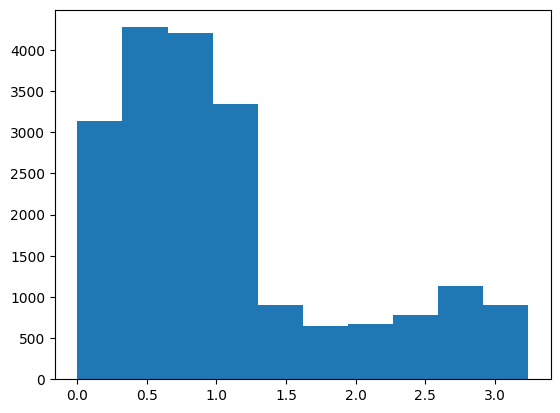

In [2]:
plt.hist(bal)

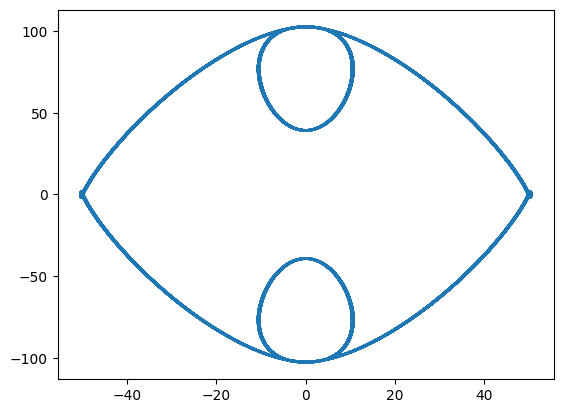

In [3]:
plt.plot(p[:, 0], p[:, 1])

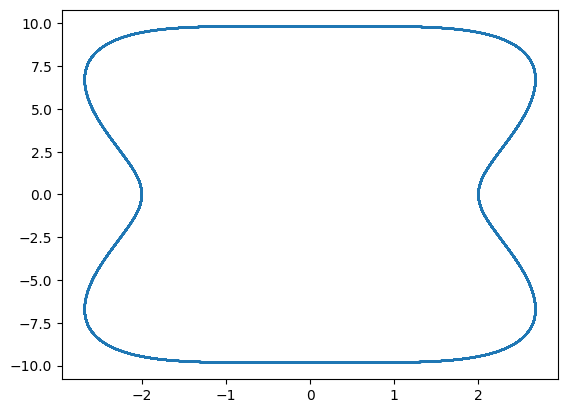

In [4]:
plt.plot(q[:, 0], q[:, 1])

In [6]:
bal[4000:].mean(), bal[1000:].std()

(np.float64(1.0736756460416652), np.float64(0.8311555727456651))

In [10]:
(bal > 500).sum()

np.int64(499)

In [21]:
print("shapes:", p.shape, q.shape)          # both (N,2)
print("first q:", q[0])
print("first p:", p[0])

shapes: (50000, 2) (50000, 2)
first q: [50.0192  0.    ]
first p: [ 0.  -9.8]


In [22]:
g0 = sf.gradV_Nx2(q[:1], sf.PARAMS)         # (1,2)
term0 = p[:1] + g0 @ sf.J.T                 # (1,2)
print("first balance (squared):", float(term0 @ term0.T))  # should be small

first balance (squared): 563473989387.6586


/var/folders/v9/pbbcbpgd4mj4sbplbm4ht36r0000gq/T/ipykernel_4275/1847163772.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("first balance (squared):", float(term0 @ term0.T))  # should be small


In [26]:
q0 = np.array([0.0, -9.8])
g0 = sf.gradV_Nx2(q0.reshape(1,2), sf.PARAMS)[0]   # -> [0, -50.0192]
p0 = -g0 @ sf.J.T                                  # -> [50.0192, 0]
term0 = p0 + g0 @ sf.J.T                           # -> [0, 0]
print("g0:", g0, "p0:", p0, "balance0:", float(term0 @ term0))

g0: [  0.     -50.0192] p0: [50.0192  0.    ] balance0: 0.0
